In [1]:
!pip install ultralytics
!pip install cvzone

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.4/40.4 kB 595.1 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 4.9 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for cvzone: filename=cvzone-1.6.1-py3-none-any.whl size=26297 sha256=20e3faa338294fa3ee7e1d0891189a796c50e1f5341a6534becfd605ed73a344
  Stored in directory: /root/.cache/pip/wheels/2c/9f/b3/92e945ac4a71bf727a92463f38155cc5a4fa49c5010b38ec4c
Successfully built cvzone


In [28]:
import numpy as np 
import pandas as pd 
import os
import cv2
import ultralytics
import cvzone
import random
import matplotlib.pyplot as plt

In [3]:
ultralytics.checks()

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 5518.9/8062.4 GB disk)


### Observing random images

In [31]:
def show_random_image():
    IMG_DIR_PATH = r"/kaggle/input/number-plate-recognition-of-vehicles/train/images"
    LABEL_DIR_PATH = r"/kaggle/input/number-plate-recognition-of-vehicles/train/labels"
    rand_img = random.choice(os.listdir(IMG_DIR_PATH))
    IMG_PATH = os.path.join(IMG_DIR_PATH, rand_img)
    LABEL_PATH = os.path.join(LABEL_DIR_PATH, rand_img.replace(".jpg", ".txt"))
    img = cv2.imread(IMG_PATH)
    actual_img = cv2.imread(IMG_PATH)
    height, width, _ = img.shape
    bboxes = []
    with open(LABEL_PATH, 'r') as f:
        bboxes = f.readlines()
    for bbox in bboxes:
        _, x_center, y_center, bbox_width, bbox_height = [float(i) for i in bbox.split()]

        x1 = int((x_center * width) - (bbox_width * width)/2)
        y1 = int((y_center * height) - (bbox_height * height)/2)
        bbox_width = int(bbox_width * width)
        bbox_height = int(bbox_height * height)
        img = cvzone.cornerRect(img, (x1, y1, bbox_width, bbox_height), l = 5, t = 2, rt = 2)
        
    no_plate = actual_img[y1: (y1 + bbox_height), x1: (x1 + bbox_width)]
    no_plate = cv2.cvtColor(no_plate, cv2.COLOR_BGR2GRAY)
    plt.figure(figsize = (10, 4))
    
    plt.subplot(1, 3, 1)
    plt.title("Actual image")
    plt.imshow(img)  
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title("No. plate")
    plt.imshow(no_plate, cmap = 'gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title("No. plate flipped")
    plt.imshow(cv2.flip(no_plate, 1), cmap = 'gray')
    plt.axis('off')
    

416 416


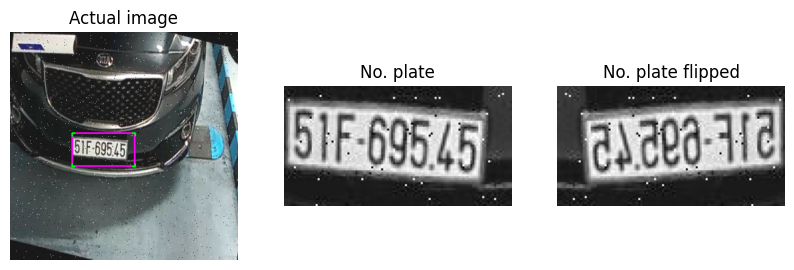

In [33]:
show_random_image()

### data.yaml
- train: ../train/images
- val: ../valid/images
- test: ../test/images

- nc: 1
- names: ['License_Plate']

### Train the `YOLOv8` model

In [35]:
!yolo mode=train model = "yolov8s.pt" data="/kaggle/input/number-plate-recognition-of-vehicles/data.yaml" imgsz = 416 epochs = 10 

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/kaggle/input/number-plate-recognition-of-vehicles/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_label

In [37]:
!yolo mode=predict model="/kaggle/working/runs/detect/train2/weights/best.pt" source="/kaggle/input/number-plate-recognition-of-vehicles/test/images/CarLongPlate114_jpg.rf.66490c41e5a9c08b551885a39ee77a6c.jpg" imgsz=416

Ultralytics YOLOv8.1.20 🚀 Python-3.10.13 torch-2.1.2 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs

image 1/1 /kaggle/input/number-plate-recognition-of-vehicles/test/images/CarLongPlate114_jpg.rf.66490c41e5a9c08b551885a39ee77a6c.jpg: 416x416 1 License_Plate, 10.1ms
Speed: 1.2ms preprocess, 10.1ms inference, 553.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
